# Análise de Qualidade dos Dados – FIFA 21 Raw

Este notebook realiza uma análise de qualidade dos dados brutos da tabela `fifa21_raw_data.csv`, considerando a camada **Raw** do pipeline.

## 1. Objetivos da Análise
- Avaliar completude dos dados
- Identificar campos inconsistentes ou problemáticos
- Entender distribuições básicas antes da camada Silver
- Detectar possíveis necessidades de tratamento futuro

## Imports e configurações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

## Carregamento dos Dados

In [5]:
df_raw = pd.read_csv("fifa21_raw_data.csv")

df_raw_temp = df_raw.copy()

/tmp/ipykernel_189365/2987745768.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("fifa21_raw_data.csv")


In [6]:
df_raw.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


## Visão Geral do Dataset

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [8]:
df_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
photoUrl,18979,18978,https://cdn.sofifa.com/players/251/698/21_60.png,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongName,18979,18851,Danny Rose,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
playerUrl,18979,18978,http://sofifa.com/player/251698/kevin-berlaso/...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,18979,164,England,1704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Positions,18979,640,CB,2441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
PAS,18979.0,NaN,NaN,NaN,57.681069,10.081914,25.0,51.0,58.0,64.0,93.0
DRI,18979.0,NaN,NaN,NaN,62.875494,9.927875,25.0,57.0,64.0,69.0,95.0
DEF,18979.0,NaN,NaN,NaN,49.865904,16.44273,12.0,35.0,53.0,63.0,91.0
PHY,18979.0,NaN,NaN,NaN,64.368618,9.601665,28.0,58.0,65.0,71.0,91.0


### {ADICIONAR COMENTÁRIOS}

## Dados Faltantes por Coluna

### Tabela de Nulos + Vazios

In [9]:
missing_data = pd.DataFrame({
    "Coluna": df_raw.columns,
    "Nulos": df_raw.isnull().sum().values,
    "Vazios": (df_raw == "").sum().values,
})

missing_data["Total"] = missing_data["Nulos"] + missing_data["Vazios"]
missing_data["%"] = (missing_data["Total"] / len(df_raw) * 100).round(2)

missing_data = missing_data[missing_data["Total"] > 0] \
    .sort_values("Total", ascending=False)

missing_data

,Coluna,Nulos,Vazios,Total,%
18,Loan Date End,17966,0,17966,94.66


### Gráfico – Top 10 Colunas com Dados Faltantes

/tmp/ipykernel_189365/3375873829.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


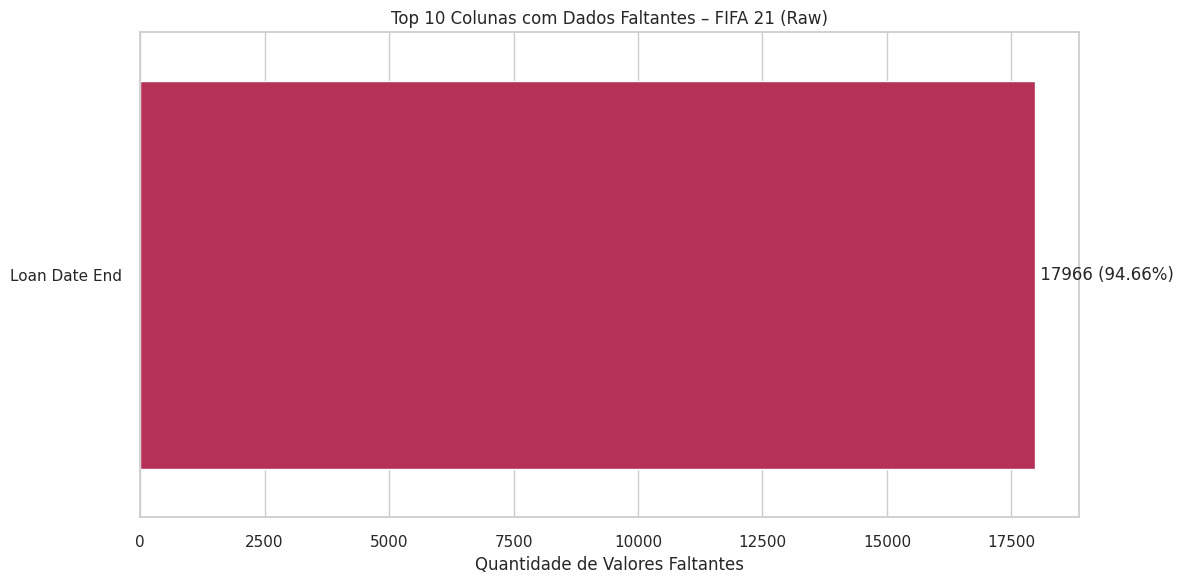

In [10]:
if len(missing_data) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))

    top_missing = missing_data.head(10)

    sns.barplot(
        data=top_missing,
        y="Coluna",
        x="Total",
        palette="rocket",
        ax=ax
    )

    ax.set_title("Top 10 Colunas com Dados Faltantes – FIFA 21 (Raw)")
    ax.set_xlabel("Quantidade de Valores Faltantes")
    ax.set_ylabel("")

    for i, row in top_missing.iterrows():
        ax.text(
            row["Total"],
            list(top_missing.index).index(i),
            f" {row['Total']} ({row['%']}%)",
            va="center"
        )

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna com valores faltantes relevantes")


### Completude por Coluna

In [11]:
completeness = (df_raw.notna().sum() / len(df_raw) * 100).sort_values()

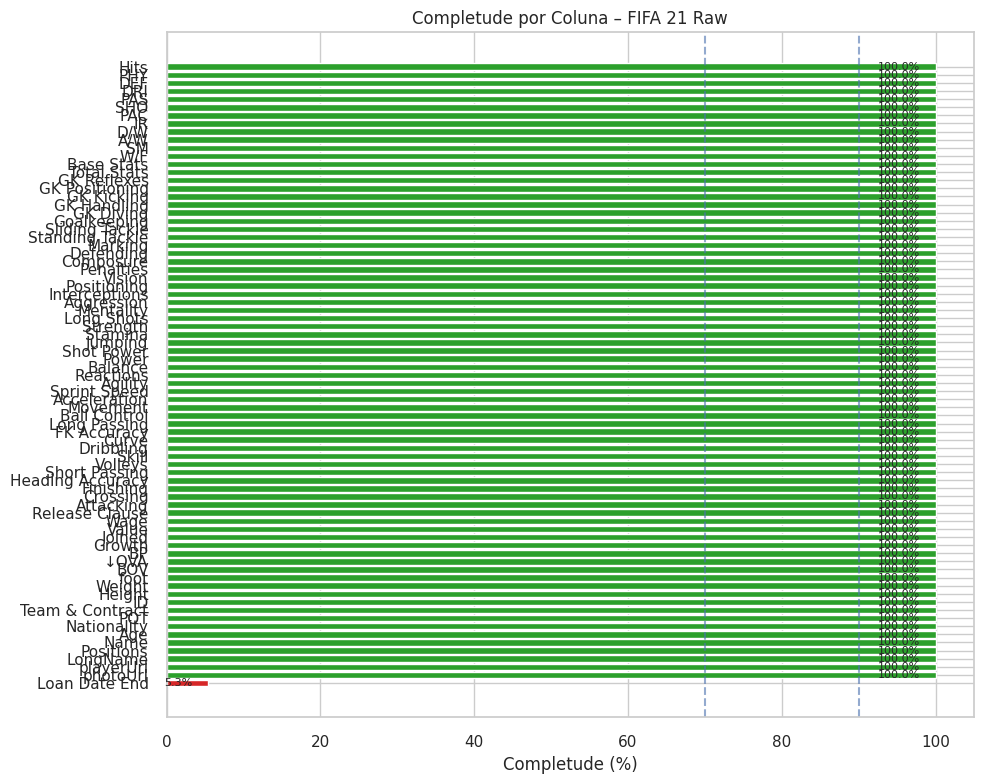

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = [
    "#d62728" if x < 70 else
    "#ff7f0e" if x < 90 else
    "#2ca02c"
    for x in completeness
]

ax.barh(completeness.index, completeness.values, color=colors)

ax.set_title("Completude por Coluna – FIFA 21 Raw")
ax.set_xlabel("Completude (%)")

ax.axvline(90, linestyle="--", alpha=0.6)
ax.axvline(70, linestyle="--", alpha=0.6)

for i, v in enumerate(completeness.values):
    ax.text(v - 2, i, f"{v:.1f}%", va="center", ha="right", fontsize=8)

plt.tight_layout()
plt.show()

### Distribuição de Idade e Overall (OVA)

In [13]:
df_raw_temp["Age"] = pd.to_numeric(df_raw_temp["Age"], errors="coerce")
df_raw_temp["OVA"] = pd.to_numeric(df_raw_temp["↓OVA"], errors="coerce")

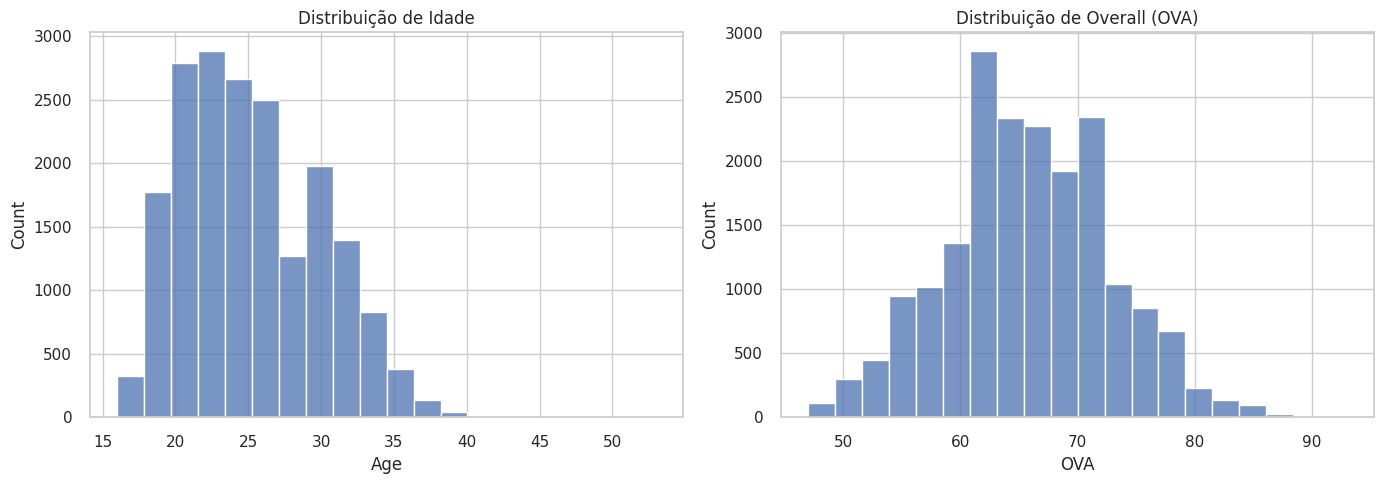

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_raw_temp["Age"], bins=20, ax=axes[0])
axes[0].set_title("Distribuição de Idade")

sns.histplot(df_raw_temp["OVA"], bins=20, ax=axes[1])
axes[1].set_title("Distribuição de Overall (OVA)")

plt.tight_layout()
plt.show()


### Distribuição de Posições dos Jogadores

In [15]:
positions = (
    df_raw_temp["Positions"]
    .dropna()
    .str.split(" ")
    .explode()
)

/tmp/ipykernel_189365/2992817991.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


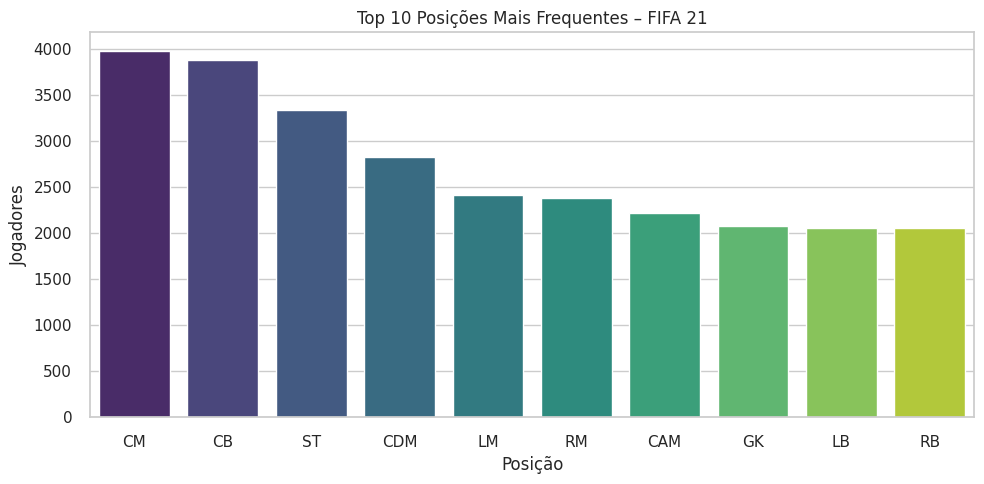

In [16]:
top_positions = positions.value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
    x=top_positions.index,
    y=top_positions.values,
    palette="viridis",
    ax=ax
)

ax.set_title("Top 10 Posições Mais Frequentes – FIFA 21")
ax.set_ylabel("Jogadores")
ax.set_xlabel("Posição")

plt.tight_layout()
plt.show()

### Análise do Campo Hits (Problema Clássico)

In [18]:
df_raw_temp["Hits_raw"] = df_raw_temp["Hits"]

df_raw_temp["Hits_numeric"] = (
    df_raw_temp["Hits"]
    .astype(str)
    .str.replace("K", "000")
    .str.replace(".", "", regex=False)
)

df_raw_temp["Hits_numeric"] = pd.to_numeric(
    df_raw_temp["Hits_numeric"],
    errors="coerce"
)

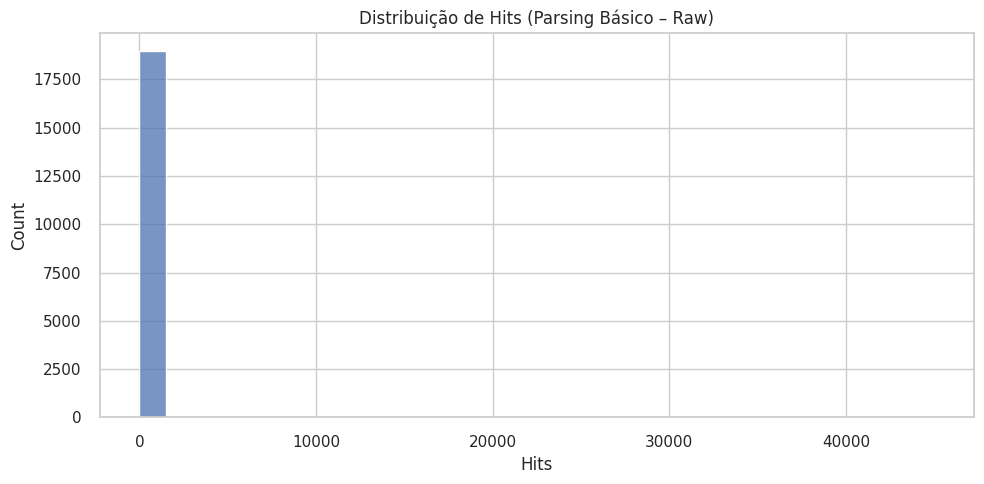

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(
    df_raw_temp["Hits_numeric"].dropna(),
    bins=30,
    ax=ax
)

ax.set_title("Distribuição de Hits (Parsing Básico – Raw)")
ax.set_xlabel("Hits")

plt.tight_layout()
plt.show()

#### {ADICIONAR COMENTÁRIOS}

## Conclusões